c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


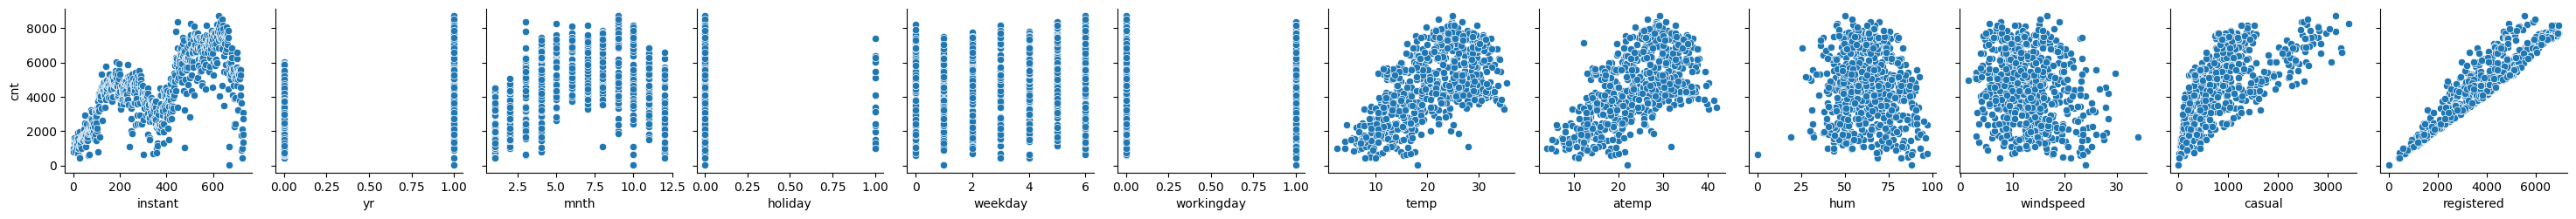

Top 3 Features Contributing to Demand:
        Feature  Coefficient
3            yr  1975.903385
2      season_4  1897.855375
9  weathersit_3 -1873.112699
The variable with the highest correlation with 'cnt' is 'registered' with a correlation value of 0.95.
R-squared score on the test set: 0.83


In [10]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv("D:\EPG_Data_Science_AI_ML\Bike sharing assignment\day.csv")

# Data preprocessing
# Convert categorical variables into dummy variables
data = pd.get_dummies(data, columns=['season', 'weathersit'], drop_first=True)


# Define the target variable 'cnt' and the feature set
X = data[['season_2', 'season_3', 'season_4', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
          'weathersit_2', 'weathersit_3', 'temp', 'atemp', 'hum', 'windspeed']]
y = data['cnt']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Exclude non-numeric columns from the correlation matrix
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Extract the correlations with the target variable 'cnt'
target_correlations = correlation_matrix['cnt']

# Find the variable with the highest correlation (excluding 'cnt' itself)
highest_correlation_variable = target_correlations.drop('cnt').idxmax()

# Calculate the value of the highest correlation
highest_correlation_value = target_correlations.drop('cnt').max()

# Visualize the pair plot
sns.pairplot(data, x_vars=target_correlations.index.drop('cnt'), y_vars=['cnt'])
plt.show()


# Extract the coefficients and feature names
coefficients = model.coef_
feature_names = X.columns

# Create a DataFrame to associate feature names with their coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of coefficients in descending order
coefficients_df['Abs_Coefficient'] = abs(coefficients_df['Coefficient'])
sorted_coefficients = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)


# Get the top 3 features
top_3_features = sorted_coefficients.head(3)

# Display the top 3 features
print("Top 3 Features Contributing to Demand:")
print(top_3_features[['Feature', 'Coefficient']])


print(f"The variable with the highest correlation with 'cnt' is '{highest_correlation_variable}' with a correlation value of {highest_correlation_value:.2f}.")
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R-squared score on the test set
r2 = r2_score(y_test, y_pred)
print("R-squared score on the test set: {:.2f}".format(r2))
